In [ ]:
!pip install torch torchvision torchaudio
!pip install tqdm
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision.datasets as datasets
import torchvision.transforms
import json
import pathlib
import tqdm as tqdm
import matplotlib.pyplot as plt
import time
from google.colab import files


class Net(nn.Module):
    """"
    Implement the VGG-11 model
    """
    def __init__(self):
        super().__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            # nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            # nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            # nn.Sigmoid(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            # nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            # nn.Sigmoid(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            # nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            # nn.Sigmoid(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            # nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.linear_layers = nn.Sequential(
            nn.Linear(512, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 10)
        )
    def forward(self, x):
        x = self.conv_layers(x)
        x = torch.flatten(x, 1)
        x = self.linear_layers(x)
        return x

class SigmoidNet(nn.Module):
    """"
    Implement the VGG-11 model
    """
    def __init__(self):
        super().__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.Sigmoid(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.Sigmoid(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.Sigmoid(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.linear_layers = nn.Sequential(
            nn.Linear(512, 4096),
            nn.Sigmoid(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.Sigmoid(),
            nn.Dropout(0.5),
            nn.Linear(4096, 10)
        )
    def forward(self, x):
        x = self.conv_layers(x)
        x = torch.flatten(x, 1)
        x = self.linear_layers(x)
        return x

class NoDropOutNet(nn.Module):
    """"
    Implement the VGG-11 model
    """
    def __init__(self):
        super().__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            # nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            # nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            # nn.Sigmoid(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            # nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            # nn.Sigmoid(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            # nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            # nn.Sigmoid(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            # nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.linear_layers = nn.Sequential(
            nn.Linear(512, 4096),
            nn.ReLU(),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Linear(4096, 10)
        )
    def forward(self, x):
        x = self.conv_layers(x)
        x = torch.flatten(x, 1)
        x = self.linear_layers(x)
        return x

def plot_results(results, path, filename, title):
    plt.plot(results['train_accuracy'], '-o', label='train accuracy')
    plt.plot(results['test_accuracy'], '-o', label='test accuracy')
    plt.title(title + ' Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(path + 'accuracy_' + filename)
    plt.show()


    plt.plot(results['train_loss'], '-o', label='train loss')
    plt.plot(results['test_loss'], '-o', label='test loss')
    plt.title(title + ' Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(path + 'loss_' + filename)
    plt.show()


def run_metrics(model, loader, device, criterion=None):
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            output = model(x)
            _, predicted = torch.max(output.data, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
            # compute the loss too
            if criterion is not None:
                loss = criterion(output, y)
                running_loss += loss.item()
        average_loss = running_loss / len(loader)
        return {'accuracy': correct / total, 'loss': average_loss}

def collect_metrics(model, test_loader, device, criterion=None):
    model.eval()
    metrics_test = run_metrics(model, test_loader, device, criterion=criterion)
    if criterion is not None:
        print(f"Test loss: {metrics_test['loss']:.3f}")
    print(f"Test accuracy: {metrics_test['accuracy'] * 100:.3f}%")
    return metrics_test


def train(model, train_loader, test_loader, optimizer, criterion, device, num_epochs):
    accuracies_train = []
    loss_train = []
    accuracies_test = []
    loss_test = []
    print('Training...')
    for epoch in range(num_epochs):
        time.sleep(0.01)
        model.train()
        running_loss = 0.0
        correct = 0
        for i, (x, y) in enumerate(tqdm.tqdm(train_loader)):
            x = x.to(device)
            y = y.to(device)

            optimizer.zero_grad()
            output = model(x)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()

            correct += (output.argmax(dim=1) == y).type(torch.float).sum().item()
            running_loss += loss.item()



        accuracy = correct / len(train_loader.dataset)
        loss = running_loss / len(train_loader)
        print(f"Epoch {epoch + 1} of {num_epochs} - Training loss: {loss:.3f}, train accuracy: {accuracy * 100:.3f}%")

        # test the model
        test_results = collect_metrics(model, test_loader, device, criterion)
        accuracies_train.append(accuracy)
        loss_train.append(loss)
        accuracies_test.append(test_results['accuracy'])
        loss_test.append(test_results['loss'])
        # prevent TQDM from messing up the output

    print("Finished Training")
    results = {'train_accuracy': accuracies_train, 'train_loss': loss_train, 'test_accuracy': accuracies_test, 'test_loss': loss_test}
    return results

def store_results(title, results, path):
  plot_results(results, path, title + '.png', title='VGG-11')
  with open(path + title + '.json', 'w') as fp:
      json.dump(results, fp)

Training...


100%|██████████| 469/469 [00:24<00:00, 19.41it/s]


Epoch 1 of 20 - Training loss: 0.369, train accuracy: 89.250%
Test loss: 0.054
Test accuracy: 98.530%


100%|██████████| 469/469 [00:24<00:00, 19.10it/s]


Epoch 2 of 20 - Training loss: 0.068, train accuracy: 98.398%
Test loss: 0.054
Test accuracy: 98.710%


100%|██████████| 469/469 [00:24<00:00, 19.05it/s]


Epoch 3 of 20 - Training loss: 0.048, train accuracy: 98.892%
Test loss: 0.037
Test accuracy: 99.050%


100%|██████████| 469/469 [00:24<00:00, 19.22it/s]


Epoch 4 of 20 - Training loss: 0.034, train accuracy: 99.185%
Test loss: 0.025
Test accuracy: 99.250%


100%|██████████| 469/469 [00:25<00:00, 18.74it/s]


Epoch 5 of 20 - Training loss: 0.028, train accuracy: 99.283%
Test loss: 0.025
Test accuracy: 99.360%


100%|██████████| 469/469 [00:25<00:00, 18.70it/s]


Epoch 6 of 20 - Training loss: 0.023, train accuracy: 99.398%
Test loss: 0.035
Test accuracy: 99.200%


100%|██████████| 469/469 [00:24<00:00, 19.00it/s]


Epoch 7 of 20 - Training loss: 0.020, train accuracy: 99.480%
Test loss: 0.033
Test accuracy: 99.090%


100%|██████████| 469/469 [00:25<00:00, 18.69it/s]


Epoch 8 of 20 - Training loss: 0.016, train accuracy: 99.623%
Test loss: 0.031
Test accuracy: 99.270%


100%|██████████| 469/469 [00:25<00:00, 18.70it/s]


Epoch 9 of 20 - Training loss: 0.014, train accuracy: 99.602%
Test loss: 0.036
Test accuracy: 99.090%


100%|██████████| 469/469 [00:25<00:00, 18.28it/s]


Epoch 10 of 20 - Training loss: 0.014, train accuracy: 99.640%
Test loss: 0.033
Test accuracy: 99.200%


100%|██████████| 469/469 [00:25<00:00, 18.23it/s]


Epoch 11 of 20 - Training loss: 0.011, train accuracy: 99.713%
Test loss: 0.025
Test accuracy: 99.420%


100%|██████████| 469/469 [00:25<00:00, 18.37it/s]


Epoch 12 of 20 - Training loss: 0.010, train accuracy: 99.730%
Test loss: 0.023
Test accuracy: 99.460%


100%|██████████| 469/469 [00:25<00:00, 18.66it/s]


Epoch 13 of 20 - Training loss: 0.006, train accuracy: 99.827%
Test loss: 0.027
Test accuracy: 99.290%


100%|██████████| 469/469 [00:24<00:00, 19.04it/s]


Epoch 14 of 20 - Training loss: 0.006, train accuracy: 99.825%
Test loss: 0.021
Test accuracy: 99.490%


100%|██████████| 469/469 [00:25<00:00, 18.65it/s]


Epoch 15 of 20 - Training loss: 0.006, train accuracy: 99.842%
Test loss: 0.025
Test accuracy: 99.480%


100%|██████████| 469/469 [00:25<00:00, 18.69it/s]


Epoch 16 of 20 - Training loss: 0.006, train accuracy: 99.843%
Test loss: 0.026
Test accuracy: 99.450%


100%|██████████| 469/469 [00:24<00:00, 19.01it/s]


Epoch 17 of 20 - Training loss: 0.008, train accuracy: 99.803%
Test loss: 0.030
Test accuracy: 99.410%


100%|██████████| 469/469 [00:24<00:00, 18.95it/s]


Epoch 18 of 20 - Training loss: 0.004, train accuracy: 99.885%
Test loss: 0.027
Test accuracy: 99.430%


100%|██████████| 469/469 [00:25<00:00, 18.69it/s]


Epoch 19 of 20 - Training loss: 0.007, train accuracy: 99.815%
Test loss: 0.032
Test accuracy: 99.380%


100%|██████████| 469/469 [00:24<00:00, 18.76it/s]


Epoch 20 of 20 - Training loss: 0.005, train accuracy: 99.880%
Test loss: 0.027
Test accuracy: 99.420%
Finished Training


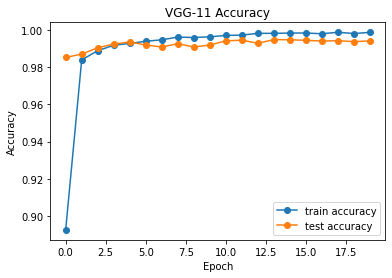

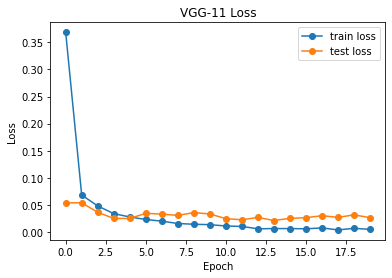

Training...


100%|██████████| 469/469 [00:25<00:00, 18.72it/s]


Epoch 1 of 20 - Training loss: 0.144, train accuracy: 95.602%
Test loss: 0.026
Test accuracy: 99.160%


100%|██████████| 469/469 [00:25<00:00, 18.49it/s]


Epoch 2 of 20 - Training loss: 0.032, train accuracy: 99.037%
Test loss: 0.032
Test accuracy: 98.950%


100%|██████████| 469/469 [00:25<00:00, 18.56it/s]


Epoch 3 of 20 - Training loss: 0.021, train accuracy: 99.375%
Test loss: 0.019
Test accuracy: 99.440%


100%|██████████| 469/469 [00:25<00:00, 18.57it/s]


Epoch 4 of 20 - Training loss: 0.016, train accuracy: 99.505%
Test loss: 0.023
Test accuracy: 99.300%


100%|██████████| 469/469 [00:25<00:00, 18.54it/s]


Epoch 5 of 20 - Training loss: 0.010, train accuracy: 99.717%
Test loss: 0.033
Test accuracy: 99.300%


100%|██████████| 469/469 [00:24<00:00, 18.78it/s]


Epoch 6 of 20 - Training loss: 0.009, train accuracy: 99.740%
Test loss: 0.027
Test accuracy: 99.250%


100%|██████████| 469/469 [00:25<00:00, 18.59it/s]


Epoch 7 of 20 - Training loss: 0.007, train accuracy: 99.770%
Test loss: 0.025
Test accuracy: 99.280%


100%|██████████| 469/469 [00:25<00:00, 18.59it/s]


Epoch 8 of 20 - Training loss: 0.006, train accuracy: 99.830%
Test loss: 0.022
Test accuracy: 99.450%


100%|██████████| 469/469 [00:24<00:00, 18.93it/s]


Epoch 9 of 20 - Training loss: 0.005, train accuracy: 99.832%
Test loss: 0.022
Test accuracy: 99.460%


100%|██████████| 469/469 [00:25<00:00, 18.61it/s]


Epoch 10 of 20 - Training loss: 0.004, train accuracy: 99.862%
Test loss: 0.024
Test accuracy: 99.410%


100%|██████████| 469/469 [00:25<00:00, 18.65it/s]


Epoch 11 of 20 - Training loss: 0.002, train accuracy: 99.912%
Test loss: 0.024
Test accuracy: 99.380%


100%|██████████| 469/469 [00:24<00:00, 18.94it/s]


Epoch 12 of 20 - Training loss: 0.001, train accuracy: 99.952%
Test loss: 0.024
Test accuracy: 99.430%


100%|██████████| 469/469 [00:25<00:00, 18.65it/s]


Epoch 13 of 20 - Training loss: 0.002, train accuracy: 99.942%
Test loss: 0.019
Test accuracy: 99.570%


100%|██████████| 469/469 [00:25<00:00, 18.55it/s]


Epoch 14 of 20 - Training loss: 0.001, train accuracy: 99.962%
Test loss: 0.021
Test accuracy: 99.500%


100%|██████████| 469/469 [00:25<00:00, 18.73it/s]


Epoch 15 of 20 - Training loss: 0.003, train accuracy: 99.910%
Test loss: 0.022
Test accuracy: 99.480%


100%|██████████| 469/469 [00:24<00:00, 18.86it/s]


Epoch 16 of 20 - Training loss: 0.001, train accuracy: 99.988%
Test loss: 0.023
Test accuracy: 99.470%


100%|██████████| 469/469 [00:25<00:00, 18.60it/s]


Epoch 17 of 20 - Training loss: 0.000, train accuracy: 99.987%
Test loss: 0.025
Test accuracy: 99.460%


100%|██████████| 469/469 [00:25<00:00, 18.60it/s]


Epoch 18 of 20 - Training loss: 0.001, train accuracy: 99.983%
Test loss: 0.021
Test accuracy: 99.520%


100%|██████████| 469/469 [00:24<00:00, 18.81it/s]


Epoch 19 of 20 - Training loss: 0.000, train accuracy: 100.000%
Test loss: 0.021
Test accuracy: 99.530%


100%|██████████| 469/469 [00:25<00:00, 18.51it/s]


Epoch 20 of 20 - Training loss: 0.000, train accuracy: 100.000%
Test loss: 0.021
Test accuracy: 99.570%
Finished Training


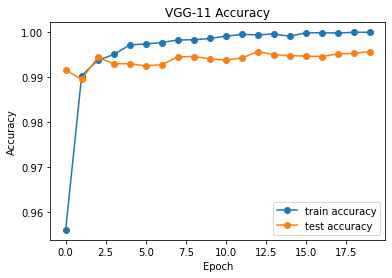

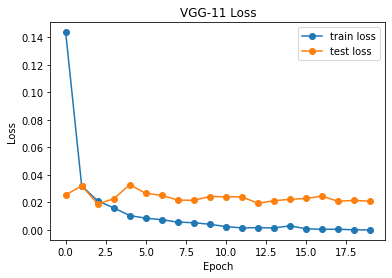

Training...


100%|██████████| 469/469 [00:27<00:00, 17.26it/s]


Epoch 1 of 20 - Training loss: 5536633.687, train accuracy: 10.232%
Test loss: 2.324
Test accuracy: 9.740%


100%|██████████| 469/469 [00:27<00:00, 17.37it/s]


Epoch 2 of 20 - Training loss: 2.343, train accuracy: 10.160%
Test loss: 2.414
Test accuracy: 9.820%


100%|██████████| 469/469 [00:26<00:00, 17.60it/s]


Epoch 3 of 20 - Training loss: 2.351, train accuracy: 10.048%
Test loss: 2.361
Test accuracy: 10.320%


100%|██████████| 469/469 [00:27<00:00, 17.35it/s]


Epoch 4 of 20 - Training loss: 2.351, train accuracy: 10.083%
Test loss: 2.368
Test accuracy: 10.320%


100%|██████████| 469/469 [00:27<00:00, 17.26it/s]


Epoch 5 of 20 - Training loss: 2.348, train accuracy: 10.105%
Test loss: 2.368
Test accuracy: 10.100%


100%|██████████| 469/469 [00:27<00:00, 17.29it/s]


Epoch 6 of 20 - Training loss: 2.348, train accuracy: 10.182%
Test loss: 2.370
Test accuracy: 9.740%


100%|██████████| 469/469 [00:26<00:00, 17.59it/s]


Epoch 7 of 20 - Training loss: 2.348, train accuracy: 10.282%
Test loss: 2.360
Test accuracy: 11.350%


100%|██████████| 469/469 [00:27<00:00, 17.34it/s]


Epoch 8 of 20 - Training loss: 2.353, train accuracy: 10.045%
Test loss: 2.349
Test accuracy: 10.090%


100%|██████████| 469/469 [00:27<00:00, 17.35it/s]


Epoch 9 of 20 - Training loss: 2.353, train accuracy: 10.108%
Test loss: 2.422
Test accuracy: 9.740%


100%|██████████| 469/469 [00:27<00:00, 17.37it/s]


Epoch 10 of 20 - Training loss: 2.347, train accuracy: 10.235%
Test loss: 2.359
Test accuracy: 11.350%


100%|██████████| 469/469 [00:26<00:00, 17.58it/s]


Epoch 11 of 20 - Training loss: 2.345, train accuracy: 10.320%
Test loss: 2.381
Test accuracy: 10.100%


100%|██████████| 469/469 [00:26<00:00, 17.38it/s]


Epoch 12 of 20 - Training loss: 2.349, train accuracy: 10.188%
Test loss: 2.327
Test accuracy: 10.100%


100%|██████████| 469/469 [00:26<00:00, 17.42it/s]


Epoch 13 of 20 - Training loss: 2.352, train accuracy: 10.187%
Test loss: 2.336
Test accuracy: 8.920%


100%|██████████| 469/469 [00:26<00:00, 17.39it/s]


Epoch 14 of 20 - Training loss: 2.349, train accuracy: 9.918%
Test loss: 2.340
Test accuracy: 11.350%


100%|██████████| 469/469 [00:26<00:00, 17.65it/s]


Epoch 15 of 20 - Training loss: 2.347, train accuracy: 10.300%
Test loss: 2.341
Test accuracy: 9.740%


100%|██████████| 469/469 [00:27<00:00, 17.31it/s]


Epoch 16 of 20 - Training loss: 2.350, train accuracy: 10.175%
Test loss: 2.329
Test accuracy: 10.280%


100%|██████████| 469/469 [00:27<00:00, 17.30it/s]


Epoch 17 of 20 - Training loss: 2.349, train accuracy: 9.893%
Test loss: 2.337
Test accuracy: 10.280%


100%|██████████| 469/469 [00:27<00:00, 17.33it/s]


Epoch 18 of 20 - Training loss: 2.348, train accuracy: 10.113%
Test loss: 2.348
Test accuracy: 8.920%


100%|██████████| 469/469 [00:26<00:00, 17.60it/s]


Epoch 19 of 20 - Training loss: 2.348, train accuracy: 10.015%
Test loss: 2.329
Test accuracy: 11.350%


100%|██████████| 469/469 [00:26<00:00, 17.37it/s]


Epoch 20 of 20 - Training loss: 2.349, train accuracy: 10.032%
Test loss: 2.362
Test accuracy: 10.100%
Finished Training


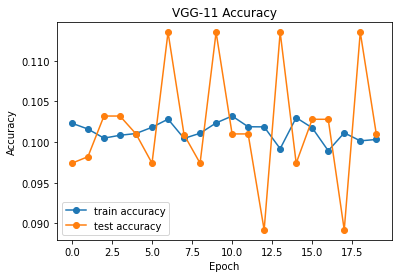

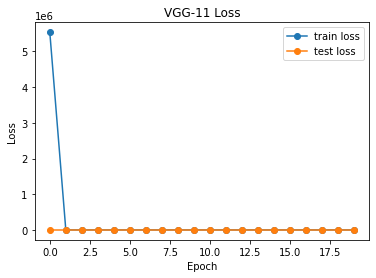

Training...


100%|██████████| 469/469 [00:27<00:00, 16.92it/s]


Epoch 1 of 20 - Training loss: 545.625, train accuracy: 10.692%
Test loss: 2.304
Test accuracy: 11.350%


100%|██████████| 469/469 [00:27<00:00, 16.93it/s]


Epoch 2 of 20 - Training loss: 2.305, train accuracy: 10.710%
Test loss: 2.306
Test accuracy: 9.560%


100%|██████████| 469/469 [00:27<00:00, 17.01it/s]


Epoch 3 of 20 - Training loss: 2.306, train accuracy: 10.405%
Test loss: 2.306
Test accuracy: 10.280%


100%|██████████| 469/469 [00:27<00:00, 17.21it/s]


Epoch 4 of 20 - Training loss: 2.307, train accuracy: 10.402%
Test loss: 2.321
Test accuracy: 10.110%


100%|██████████| 469/469 [00:27<00:00, 16.99it/s]


Epoch 5 of 20 - Training loss: 2.307, train accuracy: 10.373%
Test loss: 2.307
Test accuracy: 11.350%


100%|██████████| 469/469 [00:27<00:00, 16.93it/s]


Epoch 6 of 20 - Training loss: 2.307, train accuracy: 10.400%
Test loss: 2.316
Test accuracy: 11.350%


100%|██████████| 469/469 [00:27<00:00, 16.92it/s]


Epoch 7 of 20 - Training loss: 2.308, train accuracy: 10.388%
Test loss: 2.304
Test accuracy: 10.100%


100%|██████████| 469/469 [00:27<00:00, 17.09it/s]


Epoch 8 of 20 - Training loss: 2.308, train accuracy: 10.257%
Test loss: 2.318
Test accuracy: 10.290%


100%|██████████| 469/469 [00:27<00:00, 17.22it/s]


Epoch 9 of 20 - Training loss: 2.307, train accuracy: 10.495%
Test loss: 2.314
Test accuracy: 9.750%


100%|██████████| 469/469 [00:27<00:00, 16.91it/s]


Epoch 10 of 20 - Training loss: 2.307, train accuracy: 10.375%
Test loss: 2.320
Test accuracy: 9.830%


100%|██████████| 469/469 [00:27<00:00, 16.93it/s]


Epoch 11 of 20 - Training loss: 2.308, train accuracy: 10.473%
Test loss: 2.311
Test accuracy: 9.570%


100%|██████████| 469/469 [00:27<00:00, 16.94it/s]


Epoch 12 of 20 - Training loss: 2.307, train accuracy: 10.417%
Test loss: 2.306
Test accuracy: 10.100%


100%|██████████| 469/469 [00:27<00:00, 17.18it/s]


Epoch 13 of 20 - Training loss: 2.308, train accuracy: 10.480%
Test loss: 2.315
Test accuracy: 11.360%


100%|██████████| 469/469 [00:27<00:00, 17.18it/s]


Epoch 14 of 20 - Training loss: 2.307, train accuracy: 10.470%
Test loss: 2.307
Test accuracy: 10.320%


100%|██████████| 469/469 [00:27<00:00, 16.94it/s]


Epoch 15 of 20 - Training loss: 2.307, train accuracy: 10.305%
Test loss: 2.306
Test accuracy: 9.570%


100%|██████████| 469/469 [00:27<00:00, 16.92it/s]


Epoch 16 of 20 - Training loss: 2.308, train accuracy: 10.353%
Test loss: 2.319
Test accuracy: 11.360%


100%|██████████| 469/469 [00:27<00:00, 16.94it/s]


Epoch 17 of 20 - Training loss: 2.307, train accuracy: 10.575%
Test loss: 2.309
Test accuracy: 11.360%


100%|██████████| 469/469 [00:27<00:00, 17.19it/s]


Epoch 18 of 20 - Training loss: 2.308, train accuracy: 10.295%
Test loss: 2.303
Test accuracy: 11.350%


100%|██████████| 469/469 [00:27<00:00, 17.07it/s]


Epoch 19 of 20 - Training loss: 2.308, train accuracy: 10.252%
Test loss: 2.306
Test accuracy: 10.330%


100%|██████████| 469/469 [00:27<00:00, 17.08it/s]


Epoch 20 of 20 - Training loss: 2.307, train accuracy: 10.515%
Test loss: 2.305
Test accuracy: 10.090%
Finished Training


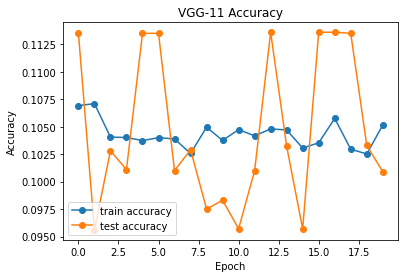

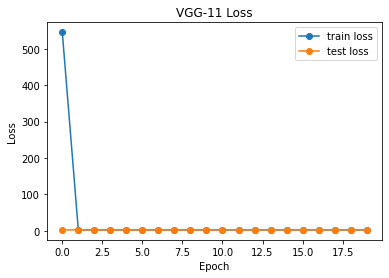

Training...


100%|██████████| 469/469 [00:26<00:00, 17.68it/s]


Epoch 1 of 20 - Training loss: 2.937, train accuracy: 46.257%
Test loss: 0.788
Test accuracy: 78.500%


100%|██████████| 469/469 [00:26<00:00, 17.75it/s]


Epoch 2 of 20 - Training loss: 0.231, train accuracy: 94.137%
Test loss: 0.109
Test accuracy: 97.070%


100%|██████████| 469/469 [00:26<00:00, 17.65it/s]


Epoch 3 of 20 - Training loss: 0.111, train accuracy: 97.350%
Test loss: 0.066
Test accuracy: 98.500%


100%|██████████| 469/469 [00:26<00:00, 17.59it/s]


Epoch 4 of 20 - Training loss: 0.083, train accuracy: 98.062%
Test loss: 0.053
Test accuracy: 98.670%


100%|██████████| 469/469 [00:26<00:00, 17.58it/s]


Epoch 5 of 20 - Training loss: 0.078, train accuracy: 98.295%
Test loss: 0.061
Test accuracy: 98.540%


100%|██████████| 469/469 [00:26<00:00, 17.74it/s]


Epoch 6 of 20 - Training loss: 0.065, train accuracy: 98.653%
Test loss: 0.044
Test accuracy: 99.150%


100%|██████████| 469/469 [00:26<00:00, 17.92it/s]


Epoch 7 of 20 - Training loss: 0.062, train accuracy: 98.750%
Test loss: 0.034
Test accuracy: 99.200%


100%|██████████| 469/469 [00:26<00:00, 17.57it/s]


Epoch 8 of 20 - Training loss: 0.041, train accuracy: 99.122%
Test loss: 0.024
Test accuracy: 99.410%


100%|██████████| 469/469 [00:26<00:00, 17.54it/s]


Epoch 9 of 20 - Training loss: 0.037, train accuracy: 99.137%
Test loss: 0.028
Test accuracy: 99.250%


100%|██████████| 469/469 [00:26<00:00, 17.57it/s]


Epoch 10 of 20 - Training loss: 0.031, train accuracy: 99.267%
Test loss: 0.043
Test accuracy: 99.220%


100%|██████████| 469/469 [00:26<00:00, 17.90it/s]


Epoch 11 of 20 - Training loss: 0.051, train accuracy: 99.218%
Test loss: 0.058
Test accuracy: 98.790%


100%|██████████| 469/469 [00:26<00:00, 17.63it/s]


Epoch 12 of 20 - Training loss: 0.054, train accuracy: 99.307%
Test loss: 0.040
Test accuracy: 99.100%


100%|██████████| 469/469 [00:26<00:00, 17.60it/s]


Epoch 13 of 20 - Training loss: 0.036, train accuracy: 99.435%
Test loss: 0.032
Test accuracy: 99.370%


100%|██████████| 469/469 [00:26<00:00, 17.65it/s]


Epoch 14 of 20 - Training loss: 0.032, train accuracy: 99.373%
Test loss: 0.040
Test accuracy: 99.290%


100%|██████████| 469/469 [00:26<00:00, 17.90it/s]


Epoch 15 of 20 - Training loss: 0.020, train accuracy: 99.560%
Test loss: 0.052
Test accuracy: 99.100%


100%|██████████| 469/469 [00:26<00:00, 17.67it/s]


Epoch 16 of 20 - Training loss: 0.096, train accuracy: 99.408%
Test loss: 0.035
Test accuracy: 99.340%


100%|██████████| 469/469 [00:26<00:00, 17.62it/s]


Epoch 17 of 20 - Training loss: 0.016, train accuracy: 99.605%
Test loss: 0.031
Test accuracy: 99.390%


100%|██████████| 469/469 [00:26<00:00, 17.57it/s]


Epoch 18 of 20 - Training loss: 0.018, train accuracy: 99.595%
Test loss: 0.046
Test accuracy: 99.290%


100%|██████████| 469/469 [00:26<00:00, 17.89it/s]


Epoch 19 of 20 - Training loss: 0.028, train accuracy: 99.505%
Test loss: 0.029
Test accuracy: 99.460%


100%|██████████| 469/469 [00:26<00:00, 17.55it/s]


Epoch 20 of 20 - Training loss: 0.014, train accuracy: 99.647%
Test loss: 0.045
Test accuracy: 99.310%
Finished Training


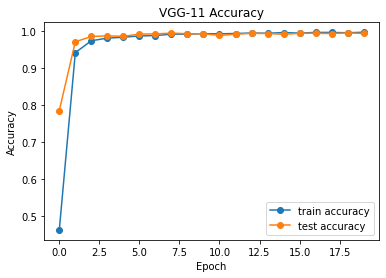

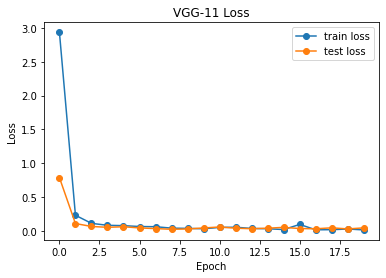

Training...


100%|██████████| 469/469 [00:28<00:00, 16.57it/s]


Epoch 1 of 20 - Training loss: 0.466, train accuracy: 82.935%
Test loss: 0.092
Test accuracy: 97.580%


100%|██████████| 469/469 [00:28<00:00, 16.62it/s]


Epoch 2 of 20 - Training loss: 0.080, train accuracy: 97.967%
Test loss: 0.120
Test accuracy: 97.520%


100%|██████████| 469/469 [00:28<00:00, 16.72it/s]


Epoch 3 of 20 - Training loss: 0.064, train accuracy: 98.517%
Test loss: 0.150
Test accuracy: 96.570%


100%|██████████| 469/469 [00:27<00:00, 16.88it/s]


Epoch 4 of 20 - Training loss: 0.062, train accuracy: 98.635%
Test loss: 0.044
Test accuracy: 99.010%


100%|██████████| 469/469 [00:28<00:00, 16.65it/s]


Epoch 5 of 20 - Training loss: 0.055, train accuracy: 98.813%
Test loss: 0.051
Test accuracy: 98.950%


100%|██████████| 469/469 [00:28<00:00, 16.63it/s]


Epoch 6 of 20 - Training loss: 0.049, train accuracy: 98.947%
Test loss: 0.039
Test accuracy: 99.020%


100%|██████████| 469/469 [00:28<00:00, 16.59it/s]


Epoch 7 of 20 - Training loss: 0.032, train accuracy: 99.252%
Test loss: 0.053
Test accuracy: 98.980%


100%|██████████| 469/469 [00:28<00:00, 16.65it/s]


Epoch 8 of 20 - Training loss: 0.032, train accuracy: 99.317%
Test loss: 0.039
Test accuracy: 99.230%


100%|██████████| 469/469 [00:27<00:00, 16.87it/s]


Epoch 9 of 20 - Training loss: 0.028, train accuracy: 99.318%
Test loss: 0.032
Test accuracy: 99.270%


100%|██████████| 469/469 [00:28<00:00, 16.66it/s]


Epoch 10 of 20 - Training loss: 0.051, train accuracy: 99.070%
Test loss: 0.063
Test accuracy: 98.780%


100%|██████████| 469/469 [00:28<00:00, 16.60it/s]


Epoch 11 of 20 - Training loss: 0.032, train accuracy: 99.225%
Test loss: 0.032
Test accuracy: 99.280%


100%|██████████| 469/469 [00:28<00:00, 16.64it/s]


Epoch 12 of 20 - Training loss: 0.021, train accuracy: 99.558%
Test loss: 0.029
Test accuracy: 99.260%


100%|██████████| 469/469 [00:28<00:00, 16.61it/s]


Epoch 13 of 20 - Training loss: 0.019, train accuracy: 99.588%
Test loss: 0.042
Test accuracy: 99.310%


100%|██████████| 469/469 [00:27<00:00, 16.86it/s]


Epoch 14 of 20 - Training loss: 0.027, train accuracy: 99.425%
Test loss: 0.028
Test accuracy: 99.390%


100%|██████████| 469/469 [00:28<00:00, 16.62it/s]


Epoch 15 of 20 - Training loss: 0.014, train accuracy: 99.642%
Test loss: 0.032
Test accuracy: 99.380%


100%|██████████| 469/469 [00:28<00:00, 16.60it/s]


Epoch 16 of 20 - Training loss: 0.014, train accuracy: 99.678%
Test loss: 0.064
Test accuracy: 98.890%


100%|██████████| 469/469 [00:28<00:00, 16.60it/s]


Epoch 17 of 20 - Training loss: 0.016, train accuracy: 99.580%
Test loss: 0.025
Test accuracy: 99.490%


100%|██████████| 469/469 [00:28<00:00, 16.61it/s]


Epoch 18 of 20 - Training loss: 0.011, train accuracy: 99.718%
Test loss: 0.044
Test accuracy: 99.280%


100%|██████████| 469/469 [00:27<00:00, 16.85it/s]


Epoch 19 of 20 - Training loss: 0.018, train accuracy: 99.592%
Test loss: 0.045
Test accuracy: 99.290%


100%|██████████| 469/469 [00:28<00:00, 16.66it/s]


Epoch 20 of 20 - Training loss: 0.026, train accuracy: 99.522%
Test loss: 0.032
Test accuracy: 99.210%
Finished Training


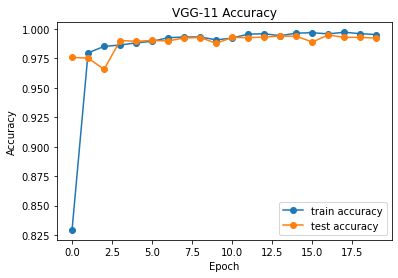

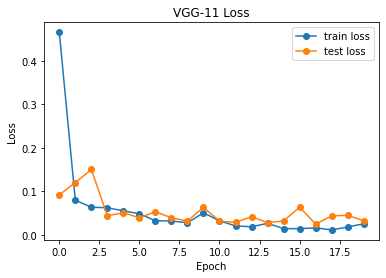

Training...


100%|██████████| 469/469 [00:25<00:00, 18.18it/s]


Epoch 1 of 20 - Training loss: 2.498, train accuracy: 10.923%
Test loss: 2.303
Test accuracy: 10.090%


100%|██████████| 469/469 [00:25<00:00, 18.21it/s]


Epoch 2 of 20 - Training loss: 2.303, train accuracy: 10.942%
Test loss: 2.302
Test accuracy: 11.350%


100%|██████████| 469/469 [00:25<00:00, 18.55it/s]


Epoch 3 of 20 - Training loss: 2.303, train accuracy: 10.722%
Test loss: 2.302
Test accuracy: 11.350%


100%|██████████| 469/469 [00:25<00:00, 18.31it/s]


Epoch 4 of 20 - Training loss: 2.303, train accuracy: 10.822%
Test loss: 2.303
Test accuracy: 11.350%


100%|██████████| 469/469 [00:25<00:00, 18.26it/s]


Epoch 5 of 20 - Training loss: 2.303, train accuracy: 10.875%
Test loss: 2.303
Test accuracy: 11.350%


100%|██████████| 469/469 [00:25<00:00, 18.18it/s]


Epoch 6 of 20 - Training loss: 2.303, train accuracy: 10.907%
Test loss: 2.302
Test accuracy: 11.350%


100%|██████████| 469/469 [00:25<00:00, 18.55it/s]


Epoch 7 of 20 - Training loss: 2.303, train accuracy: 10.903%
Test loss: 2.303
Test accuracy: 9.740%


100%|██████████| 469/469 [00:25<00:00, 18.14it/s]


Epoch 8 of 20 - Training loss: 2.303, train accuracy: 10.665%
Test loss: 2.303
Test accuracy: 10.100%


100%|██████████| 469/469 [00:25<00:00, 18.24it/s]


Epoch 9 of 20 - Training loss: 2.303, train accuracy: 10.803%
Test loss: 2.302
Test accuracy: 9.800%


100%|██████████| 469/469 [00:25<00:00, 18.23it/s]


Epoch 10 of 20 - Training loss: 2.303, train accuracy: 10.770%
Test loss: 2.301
Test accuracy: 11.350%


100%|██████████| 469/469 [00:25<00:00, 18.55it/s]


Epoch 11 of 20 - Training loss: 2.303, train accuracy: 10.832%
Test loss: 2.302
Test accuracy: 11.350%


100%|██████████| 469/469 [00:25<00:00, 18.16it/s]


Epoch 12 of 20 - Training loss: 2.303, train accuracy: 10.917%
Test loss: 2.302
Test accuracy: 11.350%


100%|██████████| 469/469 [00:25<00:00, 18.22it/s]


Epoch 13 of 20 - Training loss: 2.303, train accuracy: 10.838%
Test loss: 2.304
Test accuracy: 10.100%


100%|██████████| 469/469 [00:25<00:00, 18.23it/s]


Epoch 14 of 20 - Training loss: 2.303, train accuracy: 10.833%
Test loss: 2.302
Test accuracy: 10.100%


100%|██████████| 469/469 [00:25<00:00, 18.55it/s]


Epoch 15 of 20 - Training loss: 2.303, train accuracy: 10.700%
Test loss: 2.304
Test accuracy: 9.580%


100%|██████████| 469/469 [00:25<00:00, 18.23it/s]


Epoch 16 of 20 - Training loss: 2.303, train accuracy: 10.995%
Test loss: 2.304
Test accuracy: 10.100%


100%|██████████| 469/469 [00:25<00:00, 18.20it/s]


Epoch 17 of 20 - Training loss: 2.303, train accuracy: 10.748%
Test loss: 2.304
Test accuracy: 10.090%


100%|██████████| 469/469 [00:25<00:00, 18.37it/s]


Epoch 18 of 20 - Training loss: 2.303, train accuracy: 10.862%
Test loss: 2.301
Test accuracy: 11.350%


100%|██████████| 469/469 [00:25<00:00, 18.59it/s]


Epoch 19 of 20 - Training loss: 2.303, train accuracy: 10.788%
Test loss: 2.304
Test accuracy: 9.820%


100%|██████████| 469/469 [00:25<00:00, 18.14it/s]


Epoch 20 of 20 - Training loss: 2.303, train accuracy: 10.985%
Test loss: 2.303
Test accuracy: 10.280%
Finished Training


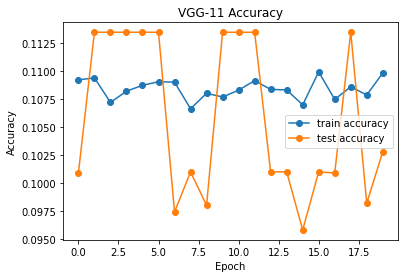

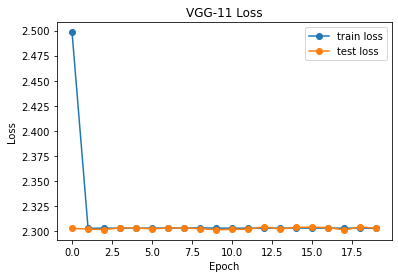

Training...


100%|██████████| 469/469 [00:25<00:00, 18.28it/s]


Epoch 1 of 20 - Training loss: 0.341, train accuracy: 88.513%
Test loss: 0.130
Test accuracy: 96.190%


100%|██████████| 469/469 [00:25<00:00, 18.37it/s]


Epoch 2 of 20 - Training loss: 0.055, train accuracy: 98.518%
Test loss: 0.058
Test accuracy: 98.410%


100%|██████████| 469/469 [00:25<00:00, 18.61it/s]


Epoch 3 of 20 - Training loss: 0.036, train accuracy: 99.035%
Test loss: 0.028
Test accuracy: 99.250%


100%|██████████| 469/469 [00:25<00:00, 18.30it/s]


Epoch 4 of 20 - Training loss: 0.027, train accuracy: 99.213%
Test loss: 0.029
Test accuracy: 99.290%


100%|██████████| 469/469 [00:25<00:00, 18.25it/s]


Epoch 5 of 20 - Training loss: 0.022, train accuracy: 99.388%
Test loss: 0.039
Test accuracy: 99.030%


100%|██████████| 469/469 [00:25<00:00, 18.54it/s]


Epoch 6 of 20 - Training loss: 0.018, train accuracy: 99.487%
Test loss: 0.031
Test accuracy: 99.260%


100%|██████████| 469/469 [00:25<00:00, 18.54it/s]


Epoch 7 of 20 - Training loss: 0.015, train accuracy: 99.567%
Test loss: 0.021
Test accuracy: 99.390%


100%|██████████| 469/469 [00:25<00:00, 18.25it/s]


Epoch 8 of 20 - Training loss: 0.011, train accuracy: 99.697%
Test loss: 0.026
Test accuracy: 99.250%


100%|██████████| 469/469 [00:25<00:00, 18.25it/s]


Epoch 9 of 20 - Training loss: 0.011, train accuracy: 99.710%
Test loss: 0.036
Test accuracy: 99.080%


100%|██████████| 469/469 [00:25<00:00, 18.60it/s]


Epoch 10 of 20 - Training loss: 0.009, train accuracy: 99.738%
Test loss: 0.059
Test accuracy: 98.560%


100%|██████████| 469/469 [00:25<00:00, 18.60it/s]


Epoch 11 of 20 - Training loss: 0.009, train accuracy: 99.743%
Test loss: 0.029
Test accuracy: 99.320%


100%|██████████| 469/469 [00:25<00:00, 18.35it/s]


Epoch 12 of 20 - Training loss: 0.008, train accuracy: 99.775%
Test loss: 0.022
Test accuracy: 99.460%


100%|██████████| 469/469 [00:25<00:00, 18.45it/s]


Epoch 13 of 20 - Training loss: 0.007, train accuracy: 99.805%
Test loss: 0.027
Test accuracy: 99.360%


100%|██████████| 469/469 [00:25<00:00, 18.70it/s]


Epoch 14 of 20 - Training loss: 0.007, train accuracy: 99.792%
Test loss: 0.023
Test accuracy: 99.400%


100%|██████████| 469/469 [00:25<00:00, 18.65it/s]


Epoch 15 of 20 - Training loss: 0.005, train accuracy: 99.845%
Test loss: 0.024
Test accuracy: 99.530%


100%|██████████| 469/469 [00:25<00:00, 18.46it/s]


Epoch 16 of 20 - Training loss: 0.004, train accuracy: 99.873%
Test loss: 0.043
Test accuracy: 98.810%


100%|██████████| 469/469 [00:25<00:00, 18.53it/s]


Epoch 17 of 20 - Training loss: 0.005, train accuracy: 99.848%
Test loss: 0.019
Test accuracy: 99.620%


100%|██████████| 469/469 [00:25<00:00, 18.73it/s]


Epoch 18 of 20 - Training loss: 0.003, train accuracy: 99.912%
Test loss: 0.028
Test accuracy: 99.470%


100%|██████████| 469/469 [00:24<00:00, 18.77it/s]


Epoch 19 of 20 - Training loss: 0.005, train accuracy: 99.845%
Test loss: 0.021
Test accuracy: 99.470%


100%|██████████| 469/469 [00:25<00:00, 18.55it/s]


Epoch 20 of 20 - Training loss: 0.004, train accuracy: 99.892%
Test loss: 0.024
Test accuracy: 99.450%
Finished Training


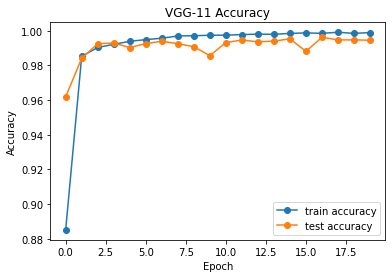

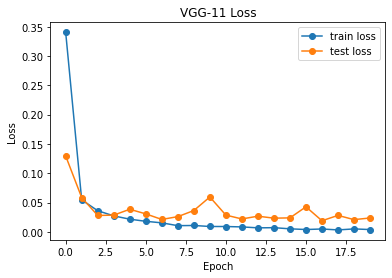

In [ ]:
NUM_EPOCHS = 20
LEARNING_RATE = 0.1
BATCH_SIZE = 128
path = '/content/drive/MyDrive/'

transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32, 32)),
    torchvision.transforms.ToTensor()
])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=BATCH_SIZE, shuffle=True)
criterion = nn.CrossEntropyLoss()

vgg11 = Net()
vgg11.to(device)

optimizer = torch.optim.SGD(vgg11.parameters(), lr=0.1, momentum=0.9)
results_train = train(vgg11, train_loader, test_loader, optimizer, criterion, device, num_epochs=NUM_EPOCHS)
store_results("vgg1", results_train, path)


vgg11 = Net()
vgg11.to(device)

optimizer = torch.optim.SGD(vgg11.parameters(), lr=0.01, momentum=0.9)
results_train = train(vgg11, train_loader, test_loader, optimizer, criterion, device, num_epochs=NUM_EPOCHS)
store_results("vgg2", results_train, path)

vgg11 = Net()
vgg11.to(device)
optimizer = torch.optim.RMSprop(vgg11.parameters(), lr=0.1, momentum=0.9)
results_train = train(vgg11, train_loader, test_loader, optimizer, criterion, device, num_epochs=NUM_EPOCHS)
store_results("vgg3", results_train, path)


vgg11 = Net()
vgg11.to(device)
optimizer = torch.optim.Adam(vgg11.parameters(), lr=0.1)
results_train = train(vgg11, train_loader, test_loader, optimizer, criterion, device, num_epochs=NUM_EPOCHS)
store_results("vgg4", results_train, path)

vgg11 = Net()
vgg11.to(device)
optimizer = torch.optim.RMSprop(vgg11.parameters(), lr=0.001)
results_train = train(vgg11, train_loader, test_loader, optimizer, criterion, device, num_epochs=NUM_EPOCHS)
store_results("vgg5", results_train, path)

vgg11 = Net()
vgg11.to(device)
optimizer = torch.optim.Adam(vgg11.parameters(), lr=0.001)
results_train = train(vgg11, train_loader, test_loader, optimizer, criterion, device, num_epochs=NUM_EPOCHS)
store_results("vgg6", results_train, path)

vgg11 = SigmoidNet()
vgg11.to(device)
optimizer = torch.optim.SGD(vgg11.parameters(), lr=0.1, momentum=0.9)
results_train = train(vgg11, train_loader, test_loader, optimizer, criterion, device, num_epochs=NUM_EPOCHS)
store_results("vgg7", results_train, path)

vgg11 = NoDropOutNet()
vgg11.to(device)
optimizer = torch.optim.SGD(vgg11.parameters(), lr=0.1, momentum=0.9)
results_train = train(vgg11, train_loader, test_loader, optimizer, criterion, device, num_epochs=NUM_EPOCHS)
store_results("vgg8", results_train, path)



In [ ]:
!pwd

/content


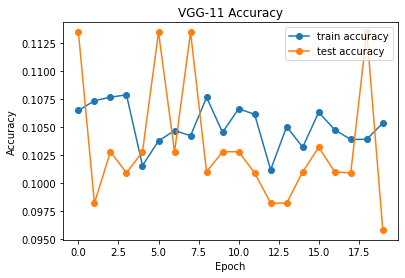

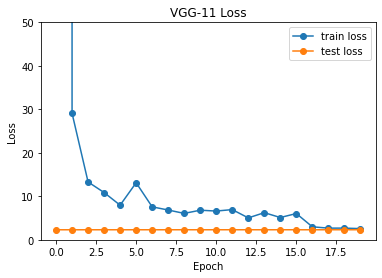

In [ ]:
def plot_results_limit(results, filename, title):
    plt.plot(results['train_accuracy'], '-o', label='train accuracy')
    plt.plot(results['test_accuracy'], '-o', label='test accuracy')
    plt.title(title + ' Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy_' + filename)
    plt.show()


    plt.plot(results['train_loss'], '-o', label='train loss')
    plt.plot(results['test_loss'], '-o', label='test loss')
    plt.title(title + ' Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0, 50])
    plt.legend()
    plt.savefig('loss_' + filename)
    plt.show()
plot_results_limit(results, 'a4_ex1.png', title='VGG-11')


In [ ]:
transforms_horizontal_flip = torchvision.transforms.Compose([
        torchvision.transforms.Resize((32, 32)),
        torchvision.transforms.RandomHorizontalFlip(p=1),
        torchvision.transforms.ToTensor()
    ])

mnist_testset_horizontal_flip = datasets.MNIST(root='./data', train=False, download=True, transform=transforms_horizontal_flip)
mnist_testloader_horizontal_flip = torch.utils.data.DataLoader(mnist_testset_horizontal_flip, batch_size=BATCH_SIZE, shuffle=True)
print("Horizontal flip")
collect_metrics(vgg11, mnist_testloader_horizontal_flip, device)

# vertical flip
transforms_vertical_flip = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32, 32)),
    torchvision.transforms.RandomVerticalFlip(p=1),
    torchvision.transforms.ToTensor()
])

mnist_testset_vertical_flip = datasets.MNIST(root='./data', train=False, download=True, transform=transforms_vertical_flip)
mnist_testloader_vertical_flip = torch.utils.data.DataLoader(mnist_testset_vertical_flip, batch_size=BATCH_SIZE,
                                                                shuffle=True)
print("Vertical flip")
collect_metrics(vgg11, mnist_testloader_vertical_flip, device)

Horizontal flip
Test accuracy: 41.850%
Vertical flip
Test accuracy: 44.370%


{'accuracy': 0.4437, 'loss': 0.0}

In [ ]:
transforms_gaussian_blur = torchvision.transforms.Compose([
        torchvision.transforms.Resize((32, 32)),
        torchvision.transforms.GaussianBlur(kernel_size=5, sigma=(1.0, 3.0)),
        torchvision.transforms.ToTensor()
    ])

mnist_testset_gaussian_blur = datasets.MNIST(root='./data', train=False, download=True, transform=transforms_gaussian_blur)
mnist_testloader_gaussian_blur = torch.utils.data.DataLoader(mnist_testset_gaussian_blur, batch_size=BATCH_SIZE,
                                                              shuffle=True)
print("Gaussian blur")
collect_metrics(vgg11, mnist_testloader_gaussian_blur, device)

Gaussian blur
Test accuracy: 97.630%


{'accuracy': 0.9763, 'loss': 0.0}

7


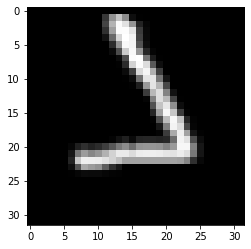

2


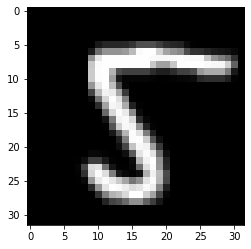

1


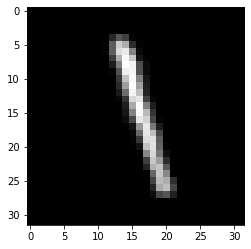

0


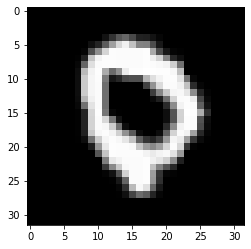

4


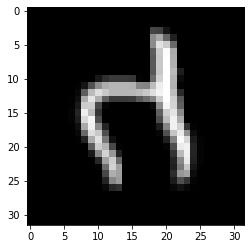

1


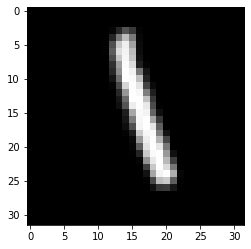

4


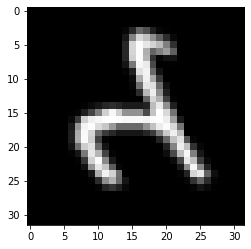

9


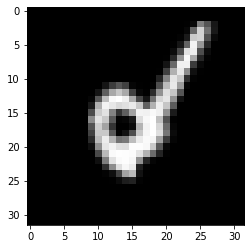

5


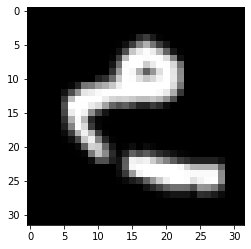

9


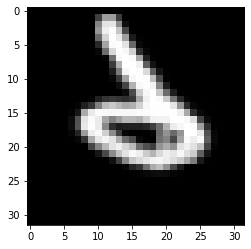

In [ ]:
vertical_flip = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32, 32)),
    torchvision.transforms.RandomVerticalFlip(p=1),
])
vertical_flipped = datasets.MNIST(root='./data', train=False, download=True, transform=vertical_flip)

for i in range(10):
  print(vertical_flipped[i][1])
  im = vertical_flipped[i][0]
  plt.imshow(im)
  plt.gray()
  plt.show()

horizontal_flip = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32, 32)),
    torchvision.transforms.RandomHorizontalFlip(p=1),
])
horizontal_flipped = datasets.MNIST(root='./data', train=False, download=True, transform=horizontal_flip)

for i in range(10):
  print(horizontal_flipped[i][1])
  im = horizontal_flipped[i][0]
  plt.imshow(im)
  plt.gray()
  plt.show()

gaussian_blur = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32, 32)),
    torchvision.transforms.GaussianBlur(kernel_size=5, sigma=(1.0, 3.0)),
])
gaussian_blurred = datasets.MNIST(root='./data', train=False, download=True, transform=gaussian_blur)

regular = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32, 32)),
])
regular_loader = datasets.MNIST(root='./data', train=False, download=True, transform=regular)

for i in range(10):
  print(gaussian_blurred[i][1])
  im = gaussian_blurred[i][0]
  plt.imshow(im)
  plt.gray()
  plt.show()
  im = regular_loader[i][0]
  plt.imshow(im)
  plt.gray()
  plt.show()